In [18]:
import random , math
from typing import Callable
from scipy . optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from sklearn.svm import SVC
import svm

### I. Generate data and fix hyperparameters

In [28]:
sigma = 2.
p = 2
type = 'power'
N1, C1 = 15, -3
N2, C2 = 15, 2.3
N3, C3 = 25, -1.6

classA = np.concatenate((np.random.randn(N1, 2) * 0.2 + [C1, 0.5], np.random.randn(N2, 2) * 0.2 + [C2, 0.5]))
classB = np.random.randn(N3, 2) * 0.2 + [C3, -0.5]
inputs = np.concatenate((classA, classB))
t = np.concatenate((np.ones(classA . shape[0]),-np.ones(classB . shape[0])))
N = inputs.shape[0]
C = 1.0
alpha = np.zeros(N)
bounds = [(0, C) for b in range(N)]
K = svm.K_matrix(x=inputs, type=type, sigma=sigma, p=p)


### II. Solve the optimization problem and compute the margin

In [29]:
ret = minimize(partial(svm.objective, K=K, t=t) , x0=alpha, bounds=bounds, constraints={'type':'eq', 'fun':partial(svm.zerofun, t=t)} )
alpha = ret['x']
indexes = list(np.argwhere(alpha > 1e-5).squeeze())


In [30]:

i = 0
idx = int(indexes[i].squeeze())
b = float(svm.b_fun(inputs=inputs, alpha=alpha, t=t, idx=idx, type=type, p=p, sigma=sigma))

### III. Plot the classification

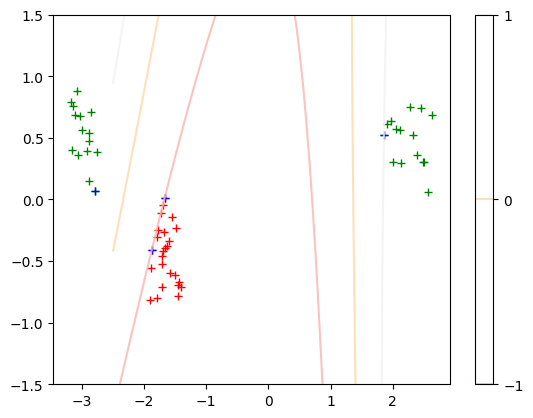

In [31]:
x_max, x_min = 2.5, -2.5
y_max, y_min = 1.5, -1.5

fig,ax=plt.subplots(1,1)

ax.plot([ p[ 0 ] for p in classA ] ,[p[1] for p in classA ] ,'g+' )
ax.plot([ p[ 0 ] for p in classB ] , [p[1] for p in classB ] ,'r+' )
ax.plot([ inputs[idx][0]for idx in indexes] , [inputs[idx][ 1 ] for idx in indexes] ,'b+' )
xgrid=np.linspace(x_min, x_max)
ygrid=np.linspace(y_min, y_max)
grid=np.array([[svm.indicator(s=(x,y) , b=b , indexes=indexes, alpha=alpha, inputs=inputs, type=type, p=p, sigma=sigma, t=t).squeeze() for x in xgrid ] for y in ygrid ])
cp = plt.contour(xgrid , ygrid , grid, (-1., 0., 1.), cmap=plt.cm.Pastel1, alpha=0.8)
fig.colorbar(cp) # Add a colorbar to a plot
plt.show()